# old 

### plain cart

In [ ]:
# cart = DecisionTreeClassifier(max_leaf_nodes=16, class_weight={0: 1, 1: 6})
# cart.fit(X_train, y_train)
# print_results(cart, X_test, y_test, age_groups_test)

spec:  0.004341534008683068
APC:  0.3850632074339372
AUC:  0.7852828289183916


In [ ]:
# stats, threshes = predict_and_save(cart, 'cart')
# plt.show()

### two trees, no transfer

In [ ]:
age_sample_weights_train = [(~is_group_1_train).astype(int), is_group_1_train.astype(int)]
subcart_no_transfer = TransferTree(2, **dtree_args)
subcart_no_transfer.fit(X_train, y_train, age_sample_weights_train)
print_results(subcart_no_transfer, X_test, y_test, age_groups_test)

spec:  0.06657018813314038
APC:  0.3720624712493928
AUC:  0.7714297699196712


In [ ]:
# plot_tree(subcart_no_transfer.trees[0], feature_names=feature_names)

In [ ]:
# plot_tree(subcart_no_transfer.trees[1], feature_names=feature_names)

### linear transfer

In [ ]:
age_sample_weights_train = [1 - p_group_1_train, p_group_1_train]
linear_transfer = TransferTree(2, **dtree_args)
linear_transfer.fit(X_train, y_train, age_sample_weights_train)
print_results(linear_transfer, X_test, y_test, age_groups_test)

spec:  0.060781476121562955
APC:  0.37001895934101336
AUC:  0.7855240252522074


### linear one-way transfer (higher -> lower)

In [ ]:
age_sample_weights_train = [1 - p_group_1_train, is_group_1_train.astype(int)]
linear_onew = TransferTree(2, **dtree_args)
linear_onew.fit(X_train, y_train, age_sample_weights_train)
print_results(linear_onew, X_test, y_test, age_groups_test)

spec:  0.060781476121562955
APC:  0.3761084875472075
AUC:  0.7868558484867552


### transfer using scores from non-age variables (predict group)

feature values are 0, 1, missing -> predict subgroup

propensity score

### density transfer

In [ ]:
# kde = KernelDensity()
# kde.fit(np.expand_dims(X_df['AgeInYears'].values, axis=1))
# np.exp(kde.score([[14]]))

<AxesSubplot:xlabel='AgeInYears', ylabel='Density'>

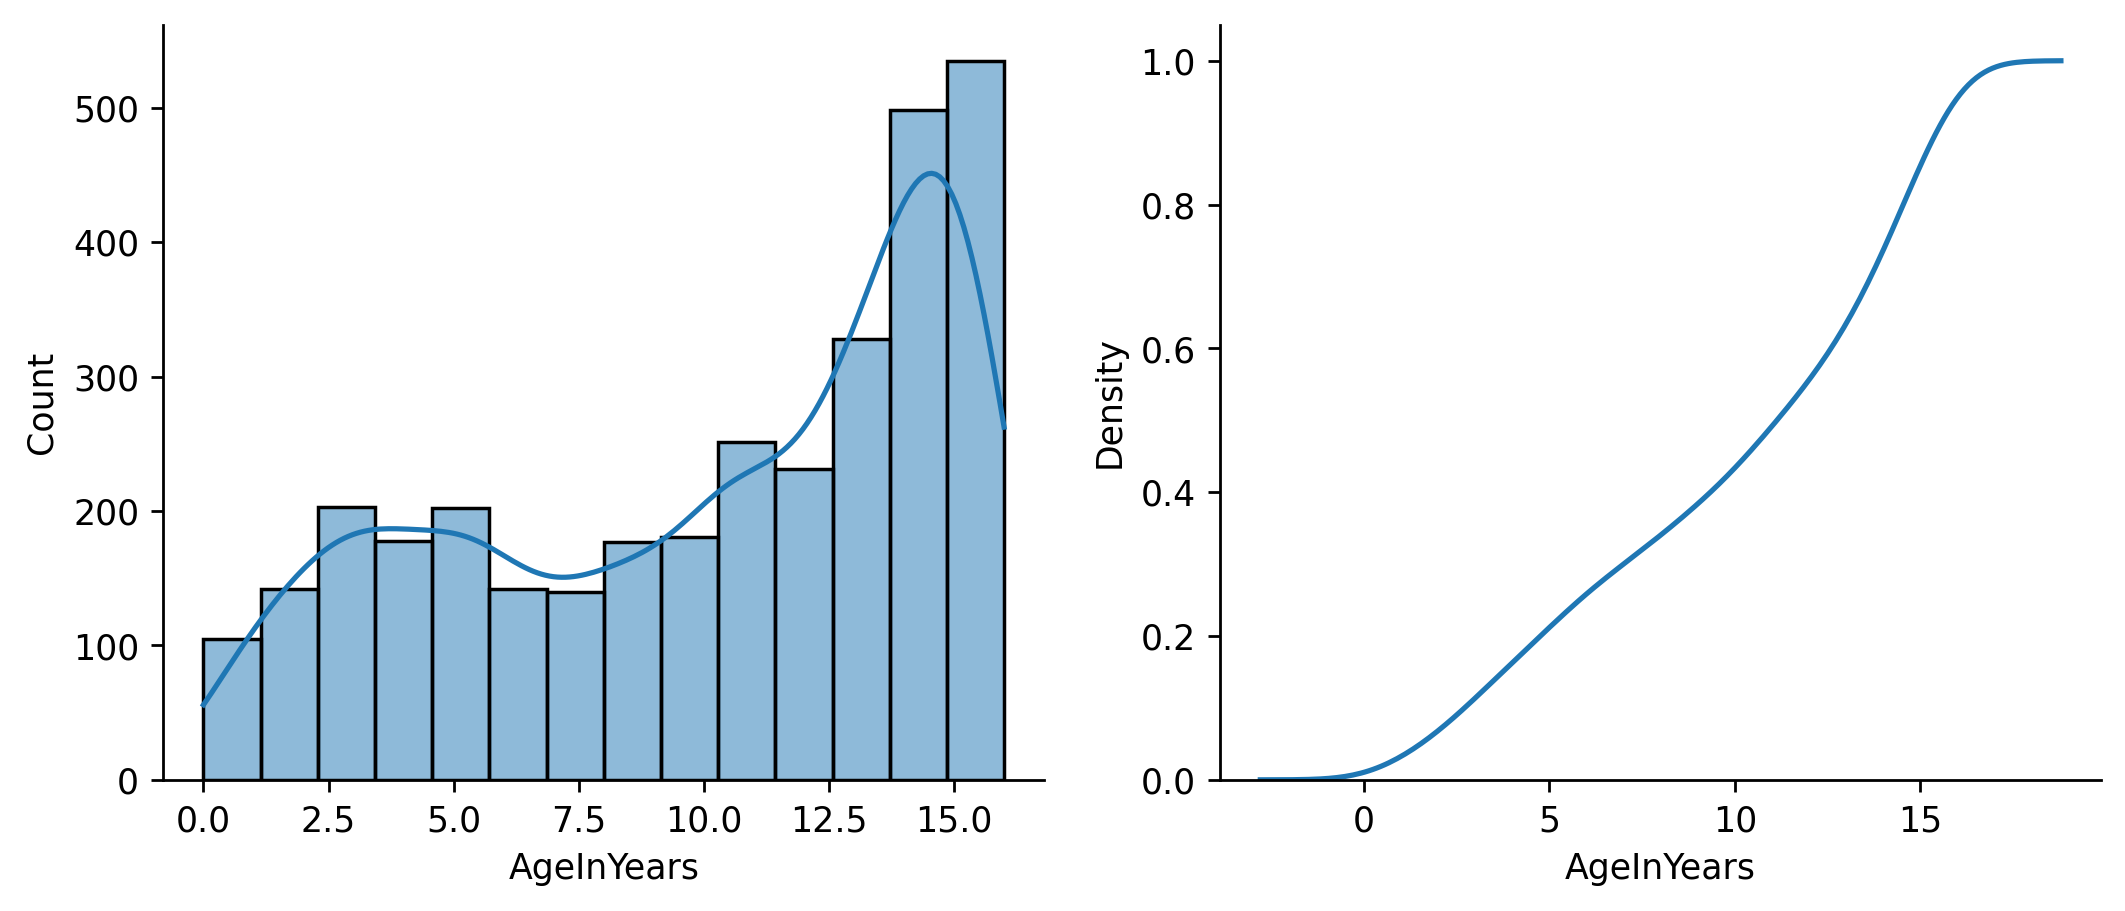

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(X_df['AgeInYears'], ax=axes[0], kde=True)
sns.kdeplot(X_df['AgeInYears'], cumulative=True, ax=axes[1])

In [ ]:
cdf_x, cdf_y = axes[1].lines[0].get_xdata(), axes[1].lines[0].get_ydata()
def kde_cdf(x):
    return cdf_y[np.searchsorted(cdf_x, x)]

In [ ]:
p_group_1_sig = X_df['AgeInYears'].apply(kde_cdf)
p_group_1_sig_train, p_group_1_sig_test = model_selection.train_test_split(
    p_group_1_sig, random_state=0)
age_sample_weights_train = [1 - p_group_1_sig_train, p_group_1_sig_train]

In [ ]:
kde_transfer = TransferTree(2, **dtree_args)
kde_transfer.fit(X_train, y_train, age_sample_weights_train)
print_results(kde_transfer, X_test, y_test, age_groups_test)

spec:  0.35021707670043417
APC:  0.37020158289499583
AUC:  0.7823727427169194


### sigmoidal transfer

In [ ]:
p_group_1_sig = 1 / (1 + np.exp(-5 * (X_df['AgeInYears'] - 7)))
p_group_1_sig_train, p_group_1_sig_test = model_selection.train_test_split(p_group_1_sig, random_state=0)
age_sample_weights_train = [1 - p_group_1_sig_train, p_group_1_sig_train]

In [ ]:
sig_transfer = TransferTree(2, **dtree_args)
sig_transfer.fit(X_train, y_train, age_sample_weights_train)
print_results(sig_transfer, X_test, y_test, age_groups_test)

spec:  0.060781476121562955
APC:  0.3691982184962685
AUC:  0.7819847312233897


### sigmoidal one-way transfer (higher -> lower)\

In [ ]:
age_sample_weights_train = [1 - p_group_1_sig_train, is_group_1_train.astype(int)]
sig_onew = TransferTree(2, **dtree_args)
sig_onew.fit(X_train, y_train, age_sample_weights_train)
print_results(sig_onew, X_test, y_test, age_groups_test)

spec:  0.060781476121562955
APC:  0.3764201996119569
AUC:  0.7849629816061577


### step transfer

In [ ]:
p_group_1_sig_train = is_group_1_train.astype(int) * 0.6
p_group_1_sig_train[p_group_1_sig_train == 0] = 0.4
age_sample_weights_train = [1 - p_group_1_sig_train, p_group_1_sig_train]

In [ ]:
step_transfer = TransferTree(2, **dtree_args)
step_transfer.fit(X_train, y_train, age_sample_weights_train)
print_results(step_transfer, X_test, y_test, age_groups_test)

spec:  0.060781476121562955
APC:  0.3830558418083852
AUC:  0.785413913882422


100%|██████████| 15/15 [00:00<00:00, 1860.55it/s]


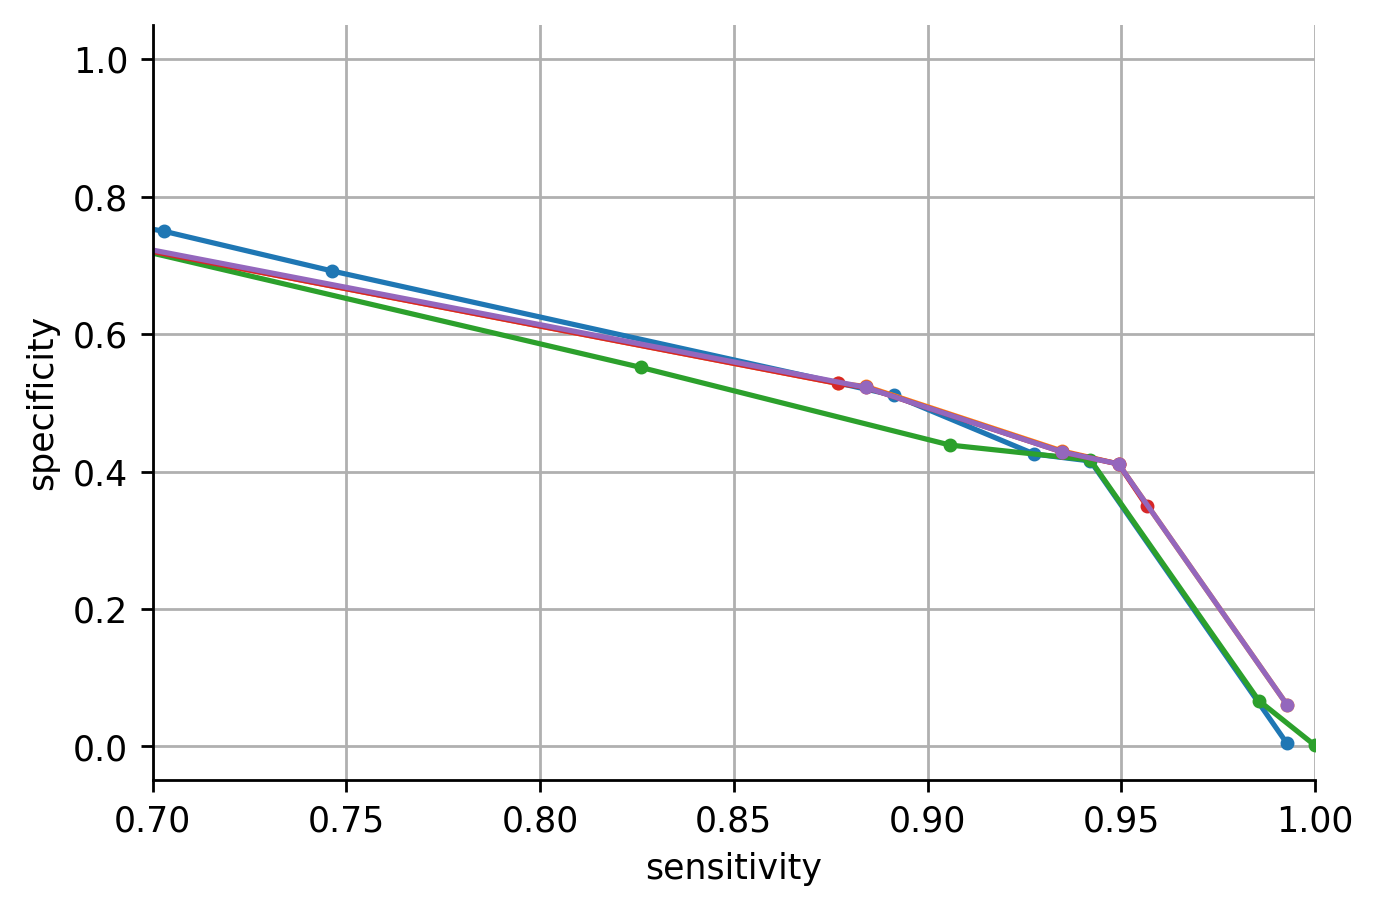

In [ ]:
stats, threshes = predict_and_save(cart, 'cart')
stats, threshes = predict_and_save(prop_transfer, 'prop-age', age_groups_test)
stats, threshes = predict_and_save(subcart_no_transfer, 'no_transfer', age_groups_test)
stats, threshes = predict_and_save(kde_transfer, 'kde_transfer', age_groups_test)
stats, threshes = predict_and_save(step_transfer, 'kde_transfer', age_groups_test)
plt.xlim(0.7, 1)
plt.show()

## site split

In [ ]:
n_sites = X_df['SITE'].unique().shape[0]
site_groups = [
    X_df['SITE'] == site for site in X_df['SITE'].sort_values().unique()]
site_groups_train, site_groups_test = zip(*[
    model_selection.train_test_split(group, random_state=2) for group in site_groups])
dtree_args['max_leaf_nodes'] = 4

In [ ]:
site_groups_nn_targets = sum([site_groups[i].astype(int) * (i + 1) for i in range(len(site_groups))])

In [ ]:
from sklearn.neural_network import MLPClassifier

prop_model = MLPClassifier((100, 100,), max_iter=500)
prop_model.fit(X_prop, site_groups_nn_targets)

/Users/keyan/anaconda3/envs/imodels-experiments/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500)

In [ ]:
all_prop_scores = prop_model.predict_proba(X_prop)
all_prop_scores_train, all_prop_scores_test = model_selection.train_test_split(all_prop_scores, random_state=2)

### plain cart

In [ ]:
cart = DecisionTreeClassifier(max_leaf_nodes=16, class_weight={0: 1, 1: 6}, random_state=0)
cart.fit(X_train, y_train)
print_results(cart, X_test, y_test, age_groups_test)

spec:  0.004341534008683068
APC:  0.3850632074339372
AUC:  0.7852828289183916


### propensity transfer

In [ ]:
site_sample_weights_train = [all_prop_scores_train[:, i] for i in range(n_sites)]
step_transfer = TransferTree(n_sites, **dtree_args)
step_transfer.fit(X_train, y_train, site_sample_weights_train)
print_results(step_transfer, X_test, y_test, site_groups_test)

spec:  0.20839363241678727
APC:  0.36283429681132984
AUC:  0.7358690408775352


### |sites| trees, no transfer

In [ ]:
site_sample_weights_train = [group.astype(int) for group in site_groups_train]
subcart_no_transfer = TransferTree(n_sites, **dtree_args)
subcart_no_transfer.fit(X_train, y_train, site_sample_weights_train)
print_results(subcart_no_transfer, X_test, y_test, site_groups_test)

spec:  0.08104196816208394
APC:  0.31733059551100673
AUC:  0.6948918811216678


### step transfer

In [ ]:
site_sample_weights_train = [group.astype(int).replace({0: 0.5}) for group in site_groups_train]
step_transfer = TransferTree(17, **dtree_args)
step_transfer.fit(X_train, y_train, site_sample_weights_train)
print_results(step_transfer, X_test, y_test, site_groups_test)

spec:  0.3921852387843705
APC:  0.3714990400734532
AUC:  0.7709368904549172


In [ ]:
ests = ['cart-16', 'prop-age', 'notransfer', 'linear', 'linear-oneway', 'kde', 'sigmoid', 'sigmoid-oneway',
        'step', 'cart-16-sites', 'prop-sites', 'notransfer-sites', 'step-sites']
pd.DataFrame(
    results_arr, columns=results_cols, index=ests).iloc[:-4].style.background_gradient()

,AUC,APC,Spec @ 95 sens
cart-16,0.785283,0.385063,0.004342
prop-age,0.785314,0.372598,0.060781
notransfer,0.771430,0.372062,0.066570
linear,0.785524,0.370019,0.060781
linear-oneway,0.786856,0.376108,0.060781
kde,0.782373,0.370202,0.350217
sigmoid,0.781985,0.369198,0.060781
sigmoid-oneway,0.784963,0.376420,0.060781
step,0.785414,0.383056,0.060781


In [ ]:
pd.DataFrame(
    results_arr, columns=results_cols, index=ests).iloc[-4:].style.background_gradient()

,AUC,APC,Spec @ 95 sens
cart-16-sites,0.785283,0.385063,0.004342
prop-sites,0.735869,0.362834,0.208394
notransfer-sites,0.694892,0.317331,0.081042
step-sites,0.770937,0.371499,0.392185


In [ ]:
X_df['SITE'].value_counts()

8.0     351
16.0    329
15.0    285
7.0     267
11.0    240
10.0    230
17.0    216
13.0    197
3.0     194
4.0     179
1.0     147
6.0     147
9.0     136
2.0     121
14.0    121
12.0     90
5.0      63
Name: SITE, dtype: int64